# 1. Exploratory Data Analysis

In [101]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [102]:
data = pd.read_csv('concrete.csv')

In [103]:
data.shape

(1030, 9)

In [104]:
data.dtypes
# All data types are float or integer

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [105]:
data.describe().T
# Meaning/Properties of terms:
# Cement: A substance that sets, hardens and adheres to other materials to bind them together
# Slag: It works synergestically with cement to increase strength and reduce permeability
# Ash: Improves steength and durability of hardened concreter
# Water: When water is mixed with cement, it forms a paste that binds the aggregate together
# Superplastic: It indirectly adds strength to hardened concrete
# Coarseagg & Fine agg: They are blended to fill the spaces left between the larger pieces and lock them
# Age: Time elapsed since concrete was poured in place and left to set
# There are some 0s as we can see min column for slag, ash & superplastic
# Mean & median for slag, ash & age are wide apart i.e. they are left skewed distributions
# Std. deviation for slag, ash & age are high

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [106]:
# Checking number of  missing values column wise
data.isnull().sum()
# No missing values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

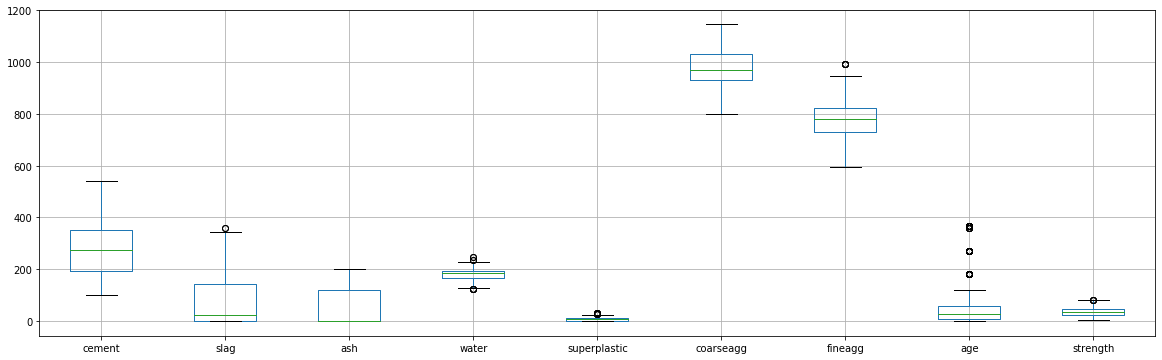

In [107]:
# Visually check outliers
data.boxplot(figsize = (20,6))
# Outliers for slag, water, superplastic, fineagg & age

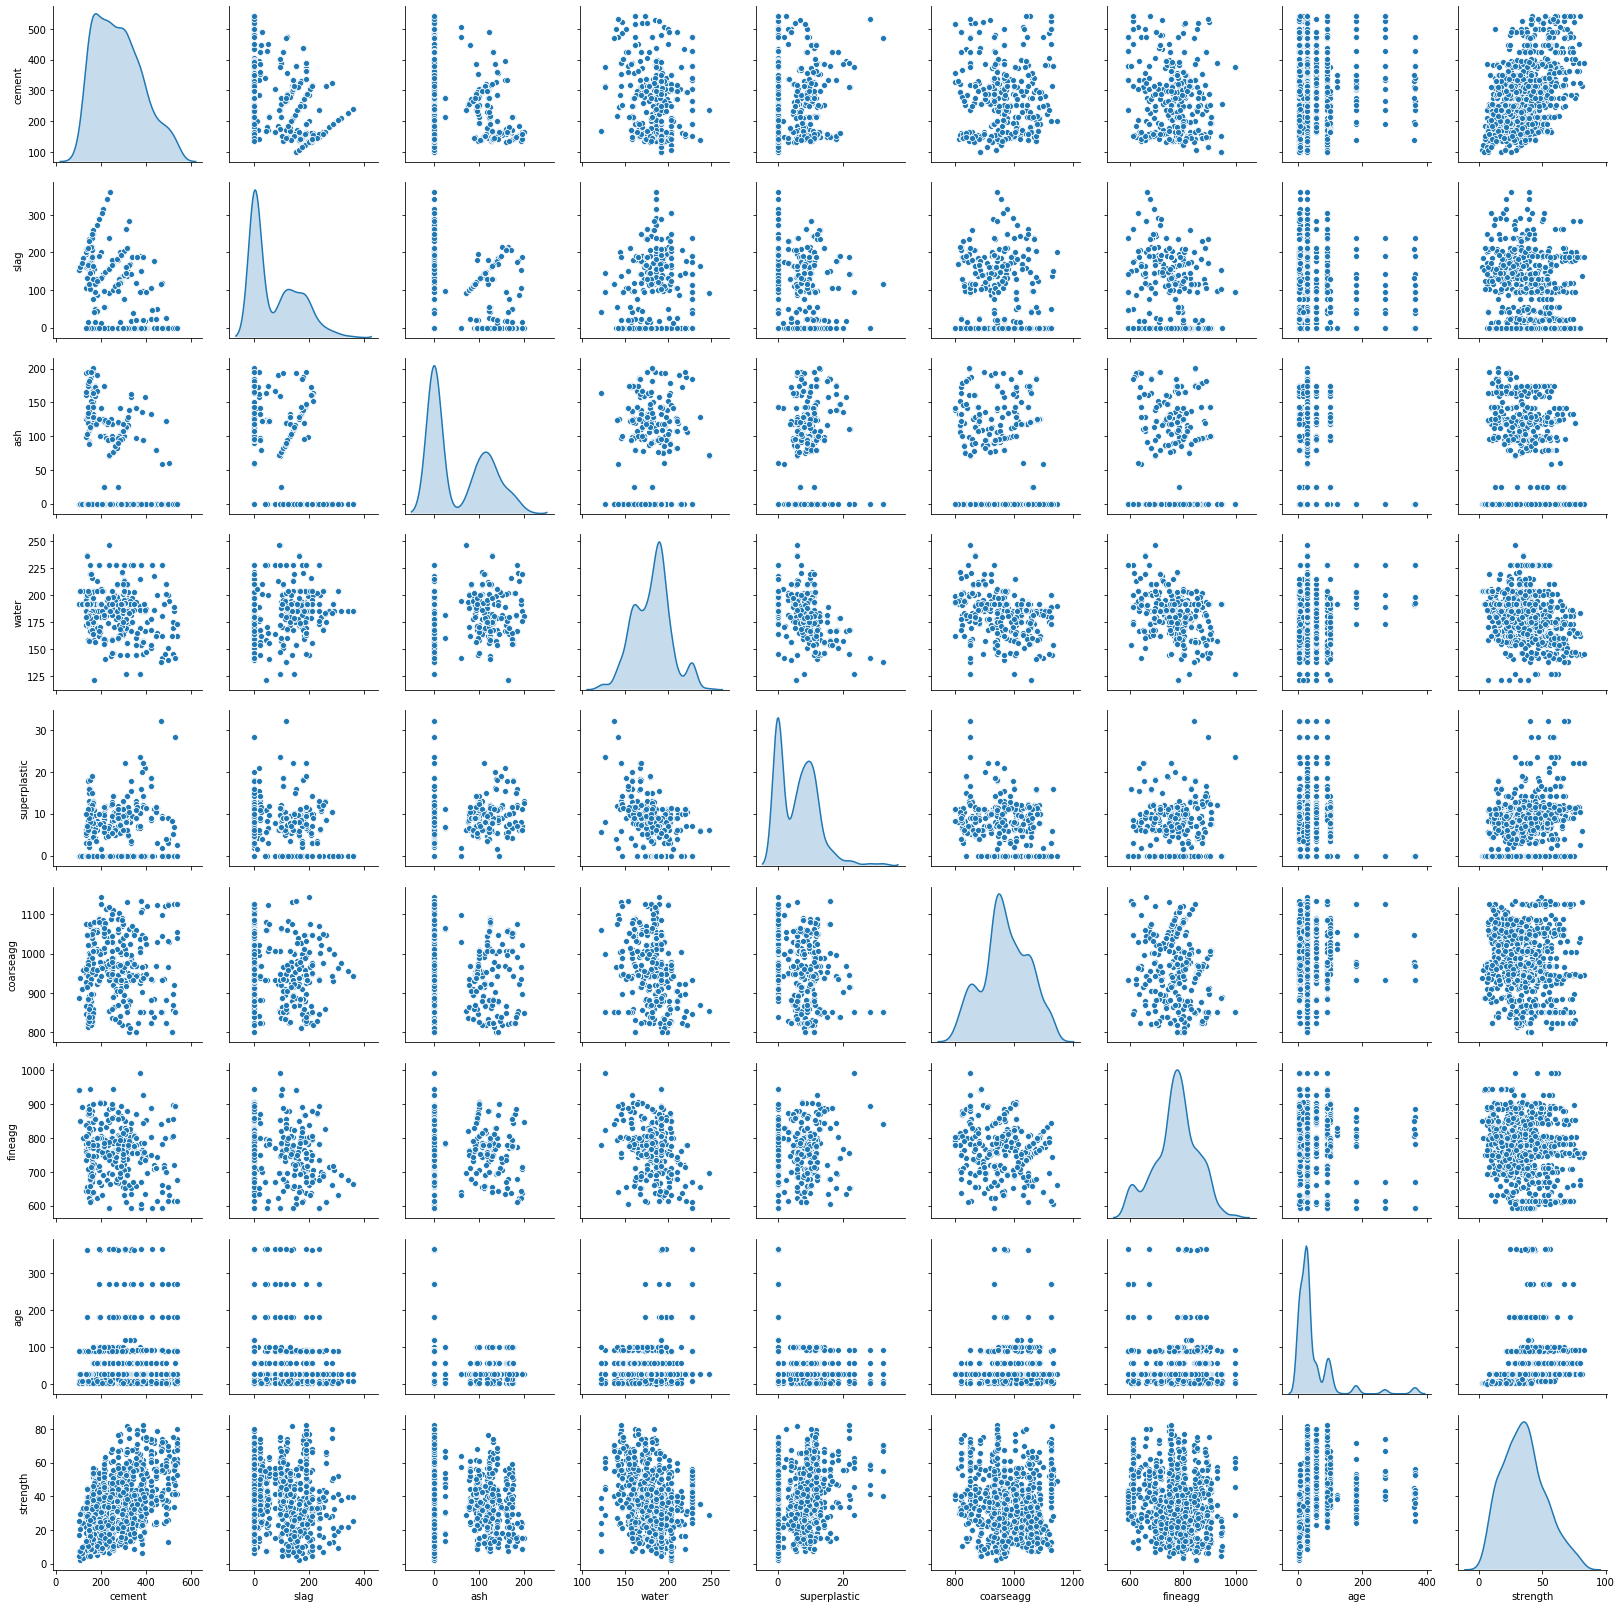

In [108]:
sns.pairplot(data, diag_kind = 'kde')

In [109]:
# 1a) Univariate Analysis: See the kernel density curve in pair-plots for diagonal elements
# Cement: Data is slightly right skewed as mean is greater than median; Looks to be mix of 3 gaussian curves
# Slag: Data is right skewed as mean is greater than median by a large number; Outliers present; Mix of 3 gaussians
# Ash: Shows mix of 3 seperate gaussians joining each other at their tails; Outliers present
# Water: Multiple gaussians (atleast 3 to 4) hidding behind each other; Outliers present; 
# Superplastic: 2 gaussian distributions; Outliers present
# Coarseagg: Mix of 3 gaussian distributions;
# Fineagg: Mix of 3 to 4 gaussian; Outliers present
# Age: Right skewed; Outliers present; Mix of 5 gaussians
# Strength: Very close to normal distribution; Right skewed slightly; present of few outliers

In [110]:
# 1b) Multivariate Analysis: Done by off-diagonal elements
# Between independent variables
# Slag & Cement: Data points looks like a cloud; Seems to be very low correlation
# Ash & Cement: Data points looks like a cloud; Seems to be very low correlation
# Slag & Ash: Data points looks like a cloud; Seems to be very low correlation
# Water & Cement: Data points looks like a cloud; Seems to be very low correlation
# Water & Slag: Data points looks like a cloud; Seems to be very low correlation
# Water & Ash: Data points looks like a cloud; Seems to be very low correlation
# The above story goes on. There seems to be very low correlation between independent attributes; Good for model building
# Between independent and dependent attributes
# Strength & Cement: Positive linear correlatio exist
# Strength & Slag: A number of values of slag are 0 and that may also be contributing to nil or no correlation
# Strength & Ash: Again a number of values of ash are 0; Seems to be very low or nil correlation
# Strength & Water: Spherical cloud with a tail towards end suggest that there is negative correlation
# Strength & Superplastic: A number of values are 0 for superplastic; Removing them, graph suggest a positive correlation
# Strength & Aggregates: Spherical cloud suggest no or very low correlation with aggregates
# Strength & Age: Positive correlation exist between them

In [111]:
# 1 c) Need to replace 0s of Slag, Ash & Superplastic as the data is needed for better prediction of strength
# Strategy is to replace with their medians as all of them are suffering from outliers
data = data.replace(0,np.NaN)
data = data.apply(lambda x: x.fillna(x.median()), axis = 0)
data.describe().T
# Minimum values of any attributes is not equal to 0

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0  135.948932   53.279837   11.00  129.800  135.700   
ash           1030.0  120.899417   22.595744   24.50  121.400  121.400   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    9.663495    3.645923    1.70    8.200    9.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            121.400   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [112]:
# 1c) Replacing outliers with median value
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.transform(replace))

C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\amikar.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


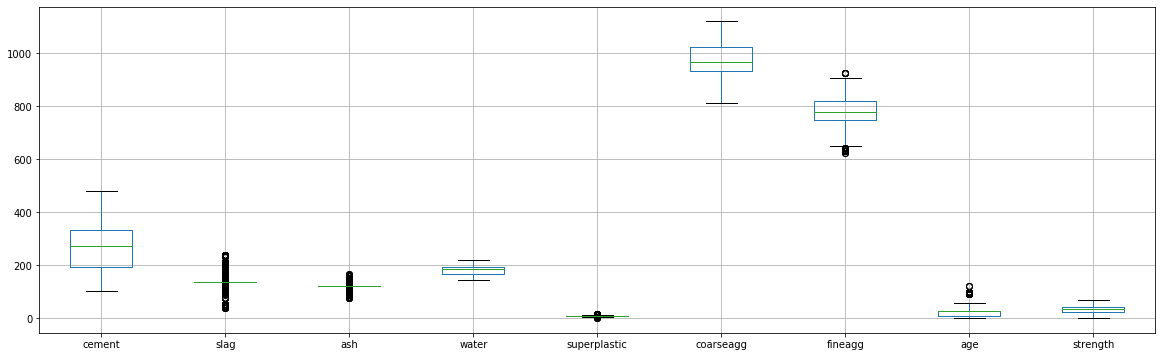

In [113]:
# Check outliers post replacement with median value
data_corrected.boxplot(figsize = (20,6))
# On comparison with the above chart, we can say that there are no outliers for water & strength
# Also, the outliers are closer to the terminal values on box-plots for superplastic, fineagga & age

# 2) & 3) Feature Engineering & Model Creation

In [114]:
# Apply z score
data_corrected_z = data_corrected.apply(zscore)
data_corrected_z.describe().T

count          mean       std       min       25%       50%  \
cement        1030.0 -3.489320e-16  1.000486 -1.856180 -0.855465  0.035628   
slag          1030.0 -3.578718e-16  1.000486 -3.006542 -0.080477 -0.080477   
ash           1030.0 -1.095618e-15  1.000486 -3.223532  0.143811  0.143811   
water         1030.0 -4.091657e-16  1.000486 -2.299323 -0.773991  0.275832   
superplastic  1030.0 -1.224210e-16  1.000486 -2.988629 -0.393861  0.074048   
coarseagg     1030.0 -1.213111e-15  1.000486 -2.184552 -0.522522 -0.015462   
fineagg       1030.0  3.904239e-16  1.000486 -2.534223 -0.508803 -0.038331   
age           1030.0 -8.903342e-17  1.000486 -1.124724 -0.908821 -0.153159   
strength      1030.0  3.634633e-16  1.000486 -2.183263 -0.714664  0.021181   

                   75%       max  
cement        0.696128  2.329383  
slag         -0.080477  3.013306  
ash           0.143811  3.526321  
water         0.708112  2.523689  
superplastic  0.286734  3.094188  
coarseagg     0.756396  2.125458  
fineagg       0.607570  2.293294  
age          -0.153159  3.157360  
strength      0.650212  2.313892

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

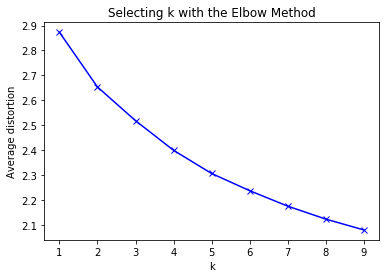

In [115]:
# K-Means clustering
# We will use elbow method to determine number of groups
# Finding optimal number of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(data_corrected_z)
    prediction = model.predict(data_corrected_z)
    meanDistortions.append(sum(np.min(cdist(data_corrected_z, model.cluster_centers_, 'euclidean'), axis =1))/data_corrected_z.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [116]:
clusters_df = pd.DataFrame( { "num_clusters":clusters, "cluster_errors": meanDistortions } )
clusters_df[0:10]

num_clusters  cluster_errors
0             1        2.873147
1             2        2.653793
2             3        2.518739
3             4        2.399941
4             5        2.307092
5             6        2.238167
6             7        2.176164
7             8        2.124314
8             9        2.080878

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015918446BE0>,
      dtype=object)

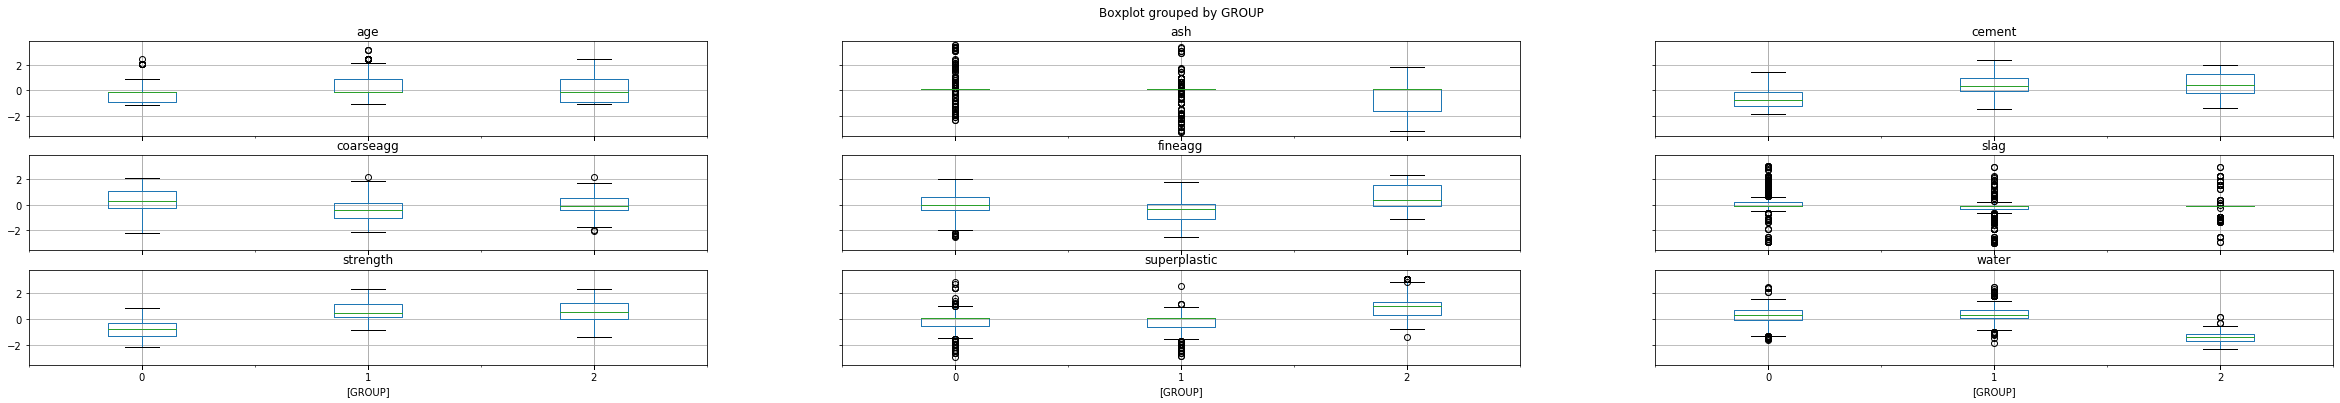

In [117]:
# Let us start with k = 3
final_model = KMeans(3)
final_model.fit(data_corrected_z)
prediction = final_model.predict(data_corrected_z)

# Append the prediction
data_corrected_z['GROUP'] = prediction
data_corrected_z.boxplot(by = 'GROUP', figsize = (40,6))
# Number of outliers; So, we need to try with k = 4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001591845D6D8>,
      dtype=object)

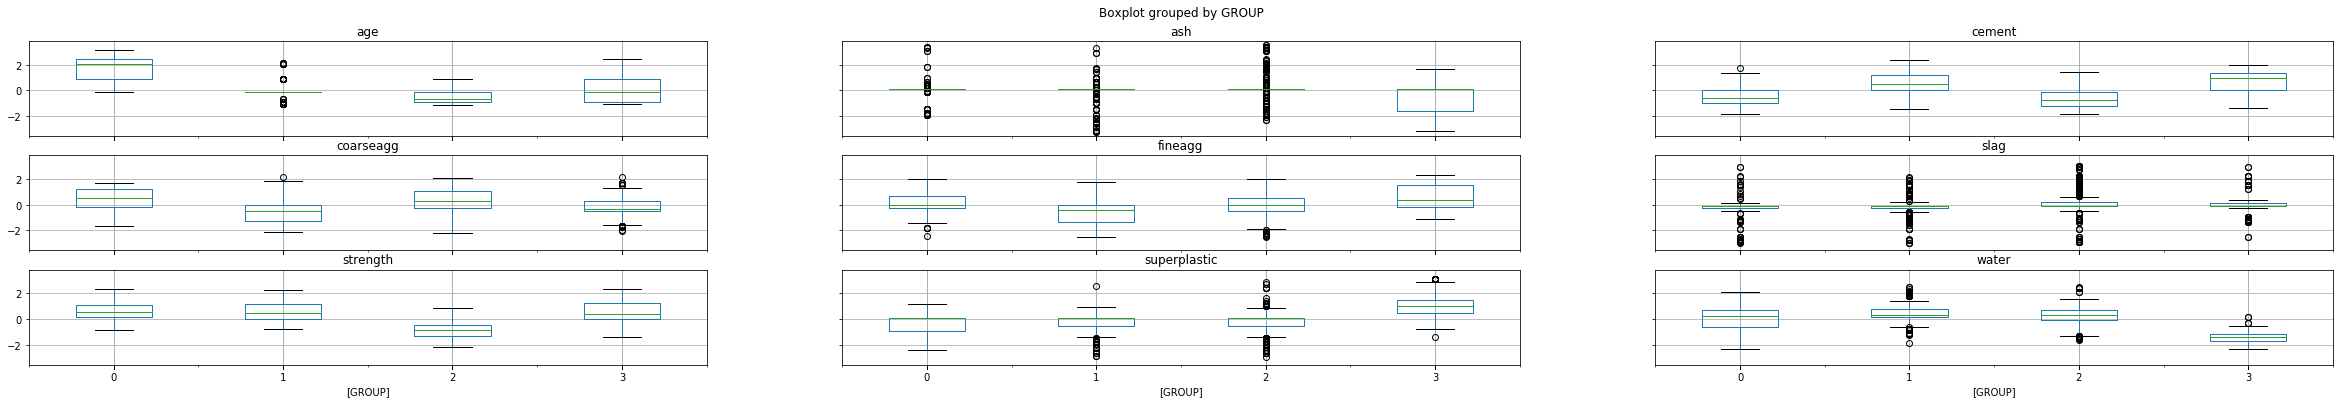

In [118]:
# Let us try with k = 4
final_model = KMeans(4)
final_model.fit(data_corrected_z)
prediction = final_model.predict(data_corrected_z)

# Append the prediction
data_corrected_z['GROUP'] = prediction
data_corrected_z.boxplot(by = 'GROUP', figsize = (40,6))
# Number of outliers; So, we need to try with k = 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159191D8AC8>,
      dtype=object)

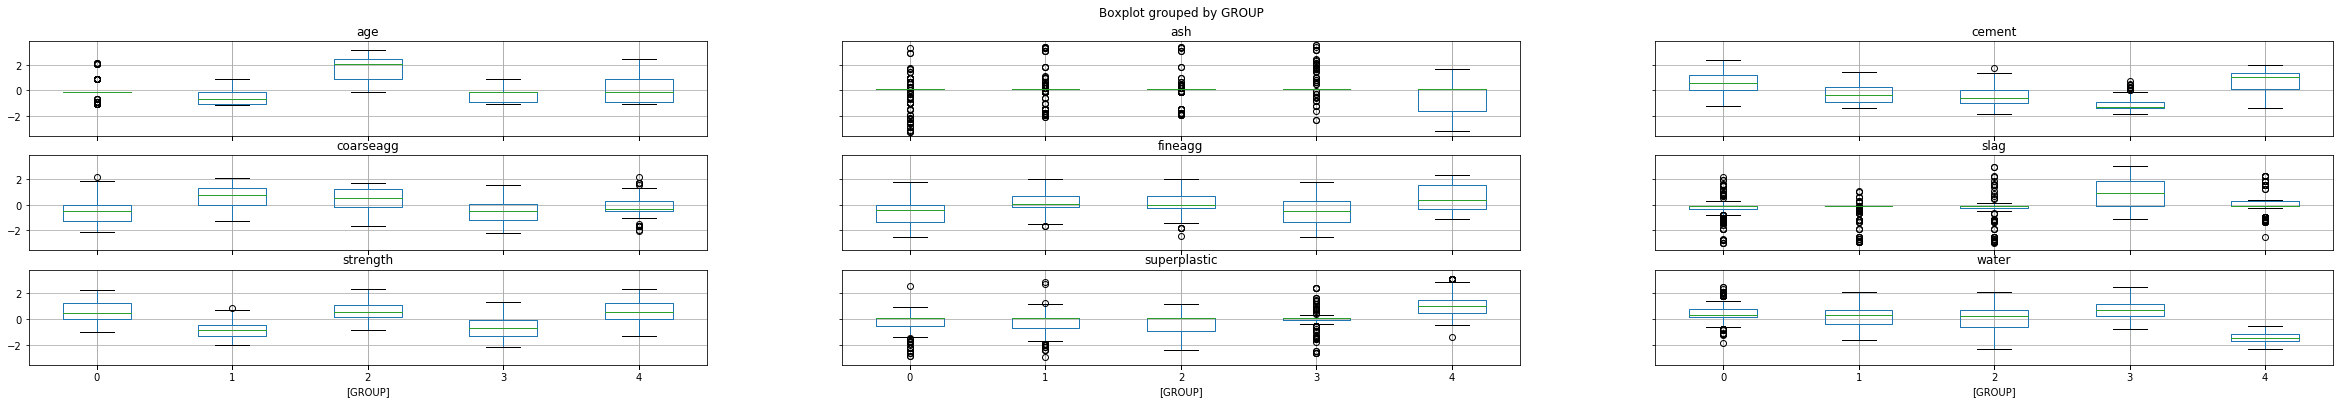

In [119]:
# Let us try with k = 5
final_model = KMeans(5)
final_model.fit(data_corrected_z)
prediction = final_model.predict(data_corrected_z)

# Append the prediction
data_corrected_z['GROUP'] = prediction
data_corrected_z.boxplot(by = 'GROUP', figsize = (40,6))
# Number of outliers; So, we need to try with k = 6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001591AF16C50>,
      dtype=object)

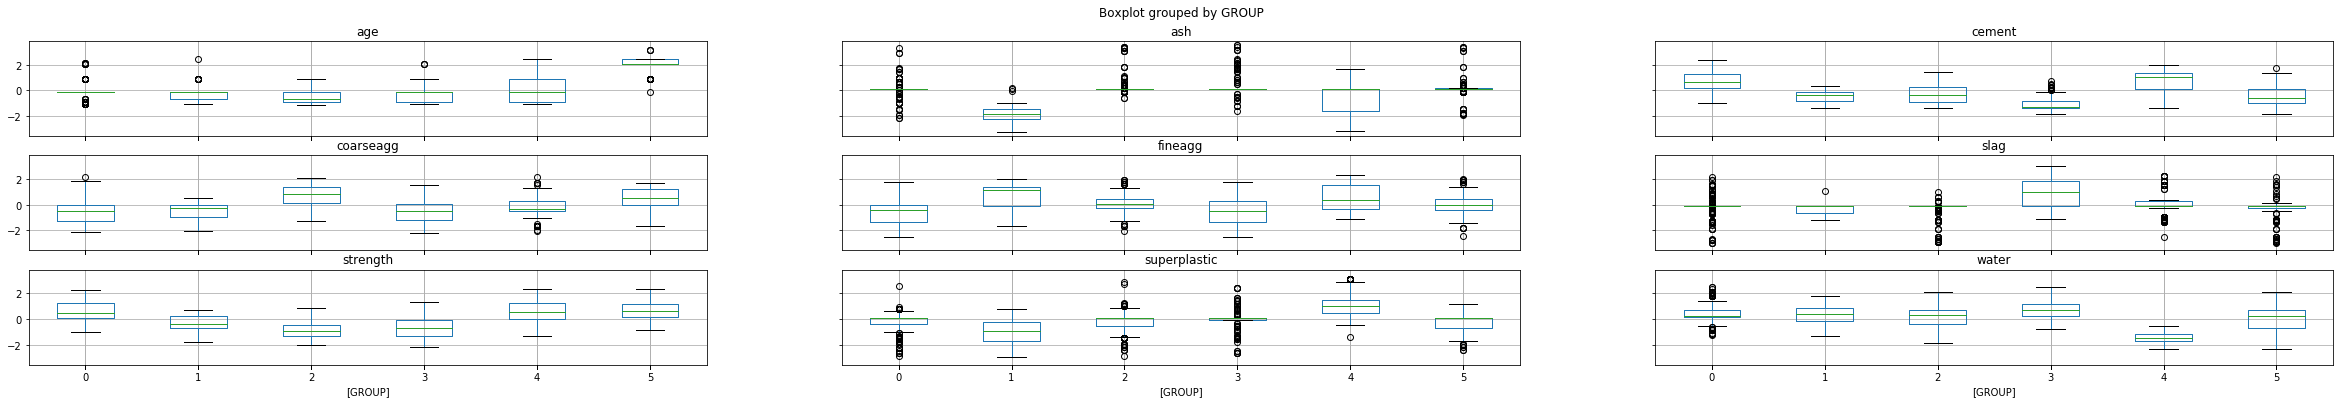

In [120]:
# Let us try with k = 6
final_model = KMeans(6)
final_model.fit(data_corrected_z)
prediction = final_model.predict(data_corrected_z)

# Append the prediction
data_corrected_z['GROUP'] = prediction
data_corrected_z.boxplot(by = 'GROUP', figsize = (40,6))
# Number of outliers;

In [121]:
# We can conclude that no distinct clusters are visible at any number of clusters
# Hence, the potential of getting better results by clustering is unlikely to give desired result
# Let's do some more analysis on feature importances for conclusive evidence on which independent variables to be retained
# The relationship b/w target and independent variables seems not to be linear 
# We can start with Decision Trees Regression in such a case

In [122]:
X = data_corrected_z.drop(['strength','GROUP'], axis = 1)
y = data_corrected_z['strength']

In [123]:
print(y.shape)
print(X.shape)

(1030,)
(1030, 8)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [125]:
print(X_test.shape)
print(y_test.shape)

(309, 8)
(309,)


In [126]:
dTree = DecisionTreeRegressor(random_state = 1)
dTree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [127]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
# Scores shows a huge drop from train to test; Suggest overfitting for training test
# The results are much expected as this is a full grown decision tree

0.9852905862460029
0.5837961141556047


In [128]:
# Feature importances
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.251246
slag          0.066963
ash           0.009657
water         0.163098
superplastic  0.017395
coarseagg     0.062272
fineagg       0.069363
age           0.360005


In [129]:
# The above result is inline with information on correlation that we got from pairplot.
# Let's take a cut-off of 10% for selecting feature from the given list of independent variables
# Also add dependent variable strength & recreate X 
dummy = ['slag','ash', 'superplastic', 'coarseagg','fineagg', 'strength', 'GROUP']
X = data_corrected_z.drop(dummy, axis = 1)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [131]:
print(X_test.shape)
print(y_test.shape)

(309, 3)
(309,)


In [132]:
dTree = DecisionTreeRegressor(random_state = 1)
dTree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [133]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
# Score has improved for test data but still not high enough

0.9753451718368877
0.6486438842340501


In [134]:
# Feature importances
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

             Imp
cement  0.406561
water   0.225631
age     0.367808


In [135]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('concrete_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train))

Credit_Tree_File.close()

In [154]:
system("dot -Tpng concrete_tree.dot -o concrete_tree.png")
Image(r"C:\Users\amikar.jha\Downloads\concrete_tree.png")

In [ ]:
# There won't be coefficients and intercepts of model
# Black Box model

# 4) Algorithm & Model Tuning

In [137]:
# Let's try ensemble models to improve the test score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [138]:
bgr = BaggingRegressor(n_estimators = 50, random_state = 1)
bgr.fit(X_train, y_train)
print("Bagging score on train data:", bgr.score(X_train, y_train))
print("Bagging score on test data:", bgr.score(X_test, y_test))

Bagging score on train data: 0.9392925158667327
Bagging score on test data: 0.7434920378088453


In [139]:
gbr = GradientBoostingRegressor(n_estimators = 50, random_state = 1)
gbr.fit(X_train, y_train)
print("Gradient Boosting score on train data:", gbr.score(X_train, y_train))
print("Gradient Boosting score on test data:", gbr.score(X_test, y_test))

Gradient Boosting score on train data: 0.7450026989736623
Gradient Boosting score on test data: 0.6609434847188314


In [140]:
rfr = RandomForestRegressor(n_estimators = 50, random_state = 1)
rfr.fit(X_train, y_train)
print("Random Forest score on train data:", rfr.score(X_train, y_train))
print("Random Forest score on test data:", rfr.score(X_test, y_test))

Random Forest score on train data: 0.9394674514818886
Random Forest score on test data: 0.7465068261790312


In [141]:
# Test scores improved from Decision Tree to all the above ensemble models; Best score from Random Forest
# Training score has reduced for all the models. This means that over-fitting has reduced for training set

In [43]:
# Let's try boot-strapping technique with Gradient Boosting & Random Forest with 95% CI
# We don't need separate set for dependent & independent variables
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
concrete_combined = X.join(y)
values = concrete_combined.values
concrete_combined.head()

cement     water       age  strength
0 -1.421015  1.418287 -0.153159 -0.290158
1 -1.115402 -1.373008 -0.656933 -0.728402
2 -0.217388  0.424042 -0.153159 -0.336180
3 -0.040222  0.275832 -0.153159  0.806139
4 -1.271530  0.788393 -0.153159 -1.086965

In [44]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concrete_combined) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = GradientBoostingRegressor(n_estimators = 50, random_state = 1)
	model.fit(train[:,:-1], train[:,-1])
	y_test = test[:,-1]
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = model.score(test[:,:-1], y_test)    # caution, overall accuracy score can mislead when classes are imbalanced
    
	stats.append(score)


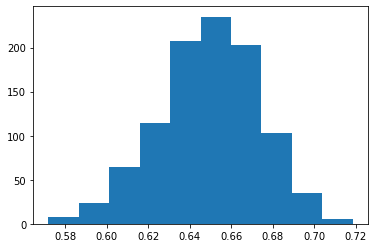

95.0 confidence interval 59.8% and 69.3%


In [46]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [47]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concrete_combined) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = RandomForestRegressor(n_estimators = 50, random_state = 1)
	model.fit(train[:,:-1], train[:,-1])
	y_test = test[:,-1]
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = model.score(test[:,:-1], y_test)    # caution, overall accuracy score can mislead when classes are imbalanced
    
	stats.append(score)


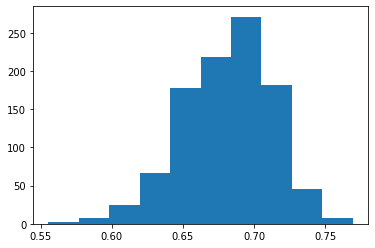

95.0 confidence interval 61.4% and 73.6%


In [48]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [49]:
# Let's fine tune the hyper-parameters of random forest regressor further to obtain a better model prediction score

In [143]:
rfr = RandomForestRegressor(n_estimators = 50, random_state = 1)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [144]:
param_grid = {"max_depth" : [3, None], 
             "max_features": [1,3],
             "min_samples_split":[3,6],
             "min_samples_leaf": [1,4],
             "bootstrap": [True],
             "n_estimators": [7,8,9]}

In [145]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfr, param_grid = param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [146]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 8}

In [147]:
best_grid = grid_search.best_estimator_

In [148]:
best_grid.score(X_test, y_test)

0.7196947254942906

In [149]:
# Random Search CV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"max_depth": [3, 10, None],
              "max_features": ['auto','log2'],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "bootstrap": [True, False],
             "n_estimators": [int(x) for x in np.linspace(10,20, num = 2)]}

In [150]:
# run randomized search
samples = 30 # number of random samples
randomCV = RandomizedSearchCV(rfr, param_distributions = random_grid, n_iter = samples)
randomCV.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=50, n_jobs=None,
               

In [151]:
randomCV.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [152]:
randomCV = randomCV.best_estimator_

In [153]:
randomCV.score(X_test, y_test)

0.729193076611453

In [ ]:
# 1. We can see the score of Random CV is better than Grid search CV because Grid search has lower probability of finding 
# the best ombination
# 2. However, scores for both grid search & random search have fallen below random forest regressor model.
# The above may be due to limitation of hyper-parameter values that we provided as input to both the models.